In [2]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import os

In [3]:
file_location = r"D:/softwares/python_workspace/data/"
test_df = pd.read_csv(file_location + "test.csv", index_col='PassengerId')
train_df = pd.read_csv(file_location + "train.csv", index_col='PassengerId')

In [5]:
# distributions 
# 1. histogram, bins capture ranges, CAPTURES FREQUENCY IN EACH BIN - to capture univariate distributions
# 2. KDE - KERNEL DISTRIBUTION ESTIMATION KDE PLOT , IS BASED ON PROBABILITY AND NOT FREQUENCY
# 3. NOMRAL DISTRIBUTION :- SYMMETRICAL
# 4. UNIVARIATE DISTRIBUTION  RIGHT SKEWED + / LEFT SKEWED -VE
#from info we understand there is no survived dataset in test df, so lets add it so that both df have similar structure
test_df['Survived'] = -888
df = pd.concat((test_df, train_df), axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


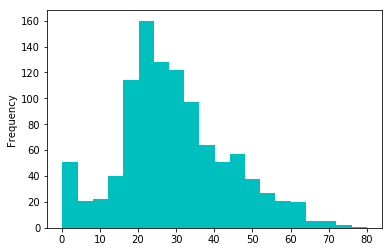

In [4]:
df.Age.plot(kind='hist', color='c', bins=20)

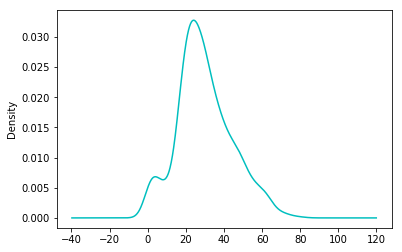

In [6]:
df.Age.plot(kind='kde', color='c')

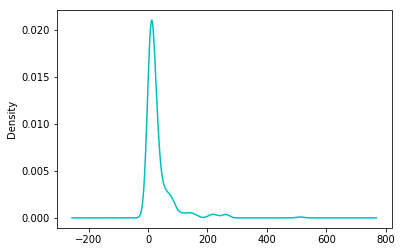

In [6]:
df.Fare.plot(kind='kde', color='c')

In [8]:
print('skewness for age:- {0:.2f}'.format(df.Age.skew()))
print('skewness for fare:- {0:.2f}'.format(df.Fare.skew()))

skewness for age:- 0.41
skewness for fare:- 4.37


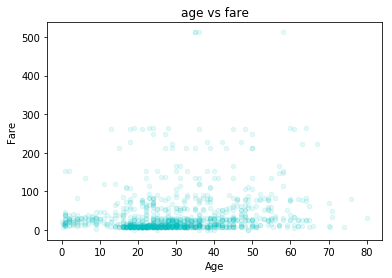

In [10]:
# 1. scatter plot its for bivariate distributions, for comparison
# 2. e.g height vs age etc.
# 3 passenger fare vs age
df.plot.scatter(x='Age', y='Fare', color='c', title='age vs fare' , alpha=0.1)


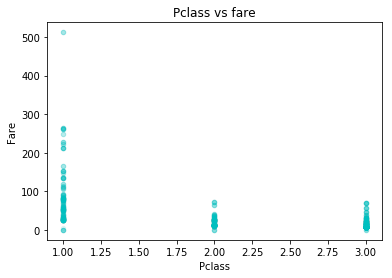

In [11]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Pclass vs fare' , alpha=0.1)


In [7]:
# basic group by
df.groupby('Sex').Age.median()
# inferance :- male and female of roughly same age were there on titanic, maybe most of them were couples

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [8]:
df.groupby('Pclass').Fare.median()
# inference :- 1st class passengers paid the highest fares on an average

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [9]:
df.groupby('Pclass')['Fare', 'Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [10]:
df.groupby('Pclass').agg({'Fare': 'mean', 'Age': 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [14]:
aggregations = {'Fare':{'mean_fare': 'mean','medain_fare': 'median', 'max_fare': 'max', 'min_fare': 'min' },
               'Age':{'mean_age': 'mean','medain_age': 'median', 'max_age': 'max', 'min_age': 'min','range_age': lambda x: max(x) - min(x) }
               }
df.groupby('Pclass').agg(aggregations)

D:\Anaconda\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age             \
        mean_fare medain_fare  max_fare min_fare   mean_age medain_age   
Pclass                                                                   
1       87.508992     60.0000  512.3292      0.0  39.159930       39.0   
2       21.179196     15.0458   73.5000      0.0  29.506705       29.0   
3       13.302889      8.0500   69.5500      0.0  24.816367       24.0   

                                  
       max_age min_age range_age  
Pclass                            
1         80.0    0.92     79.08  
2         70.0    0.67     69.33  
3         74.0    0.17     73.83

In [23]:
df.groupby(['Pclass','Embarked']).Fare.median()
# order in multi group by matters

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [18]:
# cross tab
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar')

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


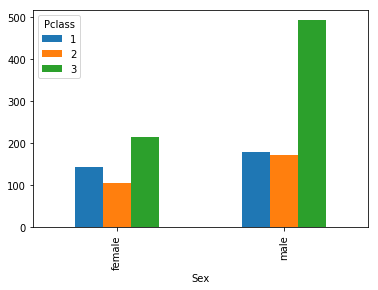

In [19]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar')

In [24]:
#pivot table
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

# same as df.groupby(['Pclass','Embarked']).Fare.median() and use unstack for exact pivot table output

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264
